# Ford GoBike System Data
## by Mohamed Fatouh

## Preliminary Wrangling

> Data consists of info about trips, for February of 2019 taken by ford gobike service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [51]:
# load the dataset and check on it
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [52]:
# show how many rows and columns the dataset has and its data types
print(df.shape)
print('-------------------------------------')
print(df.dtypes)

(183412, 16)
-------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [53]:
# check if there are nulls or duplicated values
print(df.isnull().sum())
print('-------------------------------------')
print(df.duplicated().sum())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64
-------------------------------------
0


In [54]:
# it seems that we should turn (start_time) into datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df.dropna(inplace=True)

In [55]:
#We can drop start/end_station_id, start/end_station_latitude, start/end_station_longitude, end_time columns as they are useless in our investigation.
df.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'end_time'], axis=1, inplace=True)
df.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?

> The dataset has 174952 rows and 16 columns, There are 2 interger, 7 float, 2 datetime, 4 string and 1 boolean.

### What is/are the main feature(s) of interest in your dataset?

> trip duration, name of start station, member birth year, user_type and member gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time/end time or duration in sec will help to know how long the trip, name of start station will help to know the most frequency stations to rise up bikes number, we can know member age from his birth year

# Univariate Exploration

In [56]:
base_color = sb.color_palette()[0]
def CountPlot(df, feature, color=base_color, order=None, hue=None):
    plt.figure(figsize=[15, 5])
    sb.countplot(data=df, x=feature, color=color, order=order, hue=hue);
    feature=feature.replace("_", " ")
    plt.title(f'''Distribution of {feature}'''.title(), weight='bold')
    plt.xlabel(feature.title(), weight='bold');
    plt.ylabel('Frequency'.title(), weight='bold');

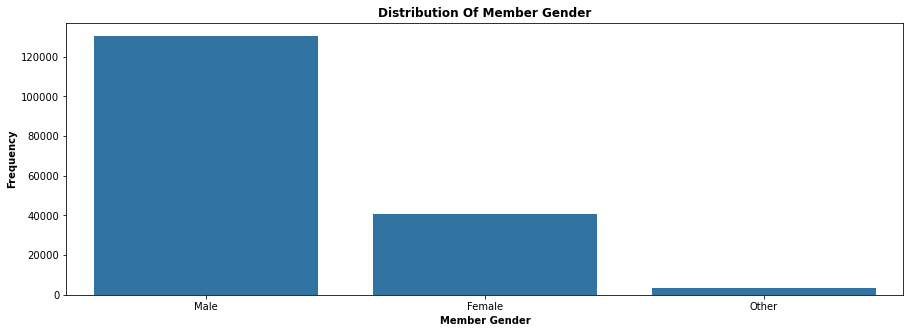

In [57]:
# let's see the count of Male, Female and Other
CountPlot(df, 'member_gender', order=df['member_gender'].value_counts().index)

## Males are the most riders.

In [58]:
# make member_age column from member_birth_year column
df['member_age'] = 2022 - df['member_birth_year']
df['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

## There is a member has 144 years old !! that is unusual.

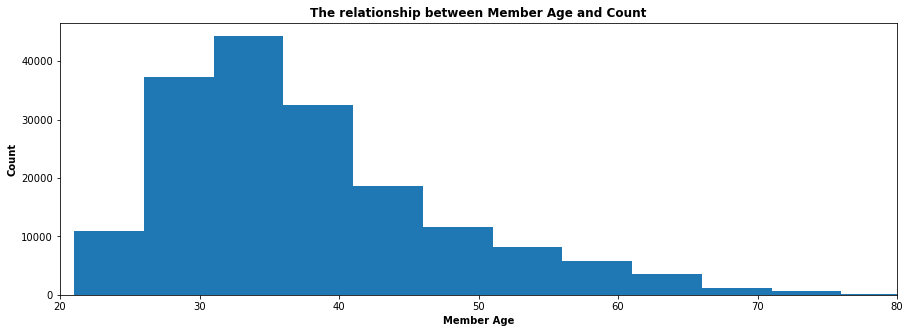

In [59]:
# let's see the count of riders ages
bins=np.arange(21, 144+5, 5)
plt.figure(figsize=[15, 5])
plt.hist(df['member_age'], bins=bins);
plt.xlim((20,80));
plt.title('The relationship between Member Age and Count', weight='bold')
plt.xlabel('Member Age', weight='bold');
plt.ylabel('Count', weight='bold');

## The most ages are between 35 and 40

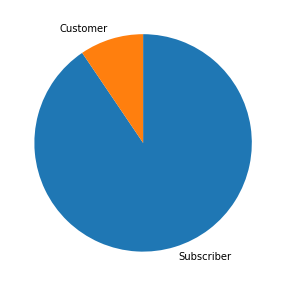

In [60]:
# what about the count of Customers and Subscribers
plt.figure(figsize=[15, 5])
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90, counterclock = False);

## Subscribers are more than Customers by 10 times maybe, So We can make offers for customers to be subscribers.

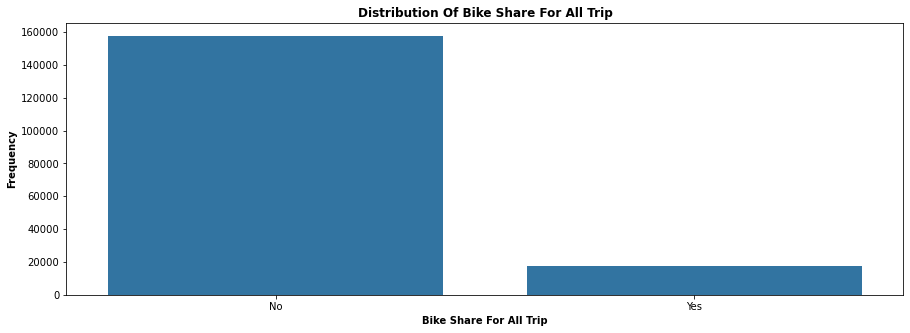

In [61]:
# check on the count of bike share for all trip option
CountPlot(df, 'bike_share_for_all_trip')

## It seems that most of riders didn't share their bike for all trip

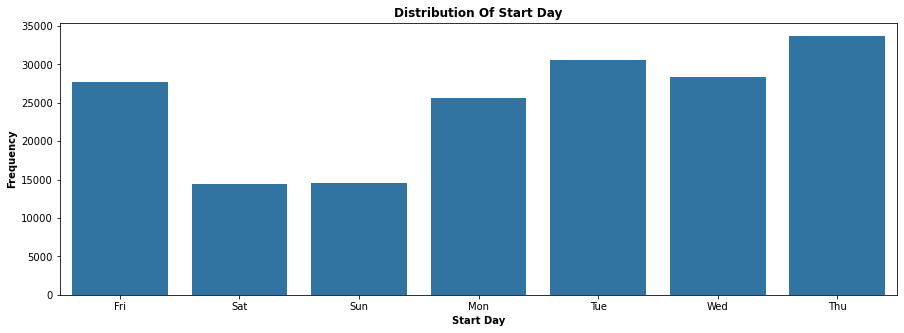

In [62]:
# extract days from (start_time) column
df['start_day']=df['start_time'].dt.strftime('%a')
CountPlot(df, 'start_day', order=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']);

## It seems that Thursday is the most busy day

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There is a member has 144 years old so I add xlim to focus on ages between 20 and 80.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were NaNs so I dropped them. I found start_time column as object data type so I turn it to datatime because I need to extract days from it. Also I dropped the useless columns.

# Bivariate Exploration


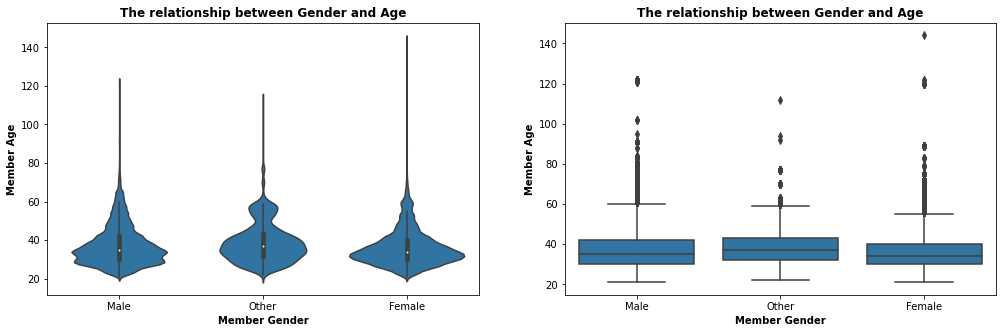

In [63]:
# let's see the most (Male/Other/Female) ages
plt.figure(figsize=[17,5])

plt.subplot(1, 2, 1)
sb.violinplot(data=df, x='member_gender', y='member_age', color=base_color)
plt.title('The relationship between Gender and Age', weight='bold')
plt.xlabel('Member Gender', weight='bold');
plt.ylabel('Member Age', weight='bold');

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='member_gender', y='member_age', color=base_color)
plt.title('The relationship between Gender and Age', weight='bold')
plt.xlabel('Member Gender', weight='bold');
plt.ylabel('Member Age', weight='bold');

## It seems that the most riders' ages are between 30 and 40.

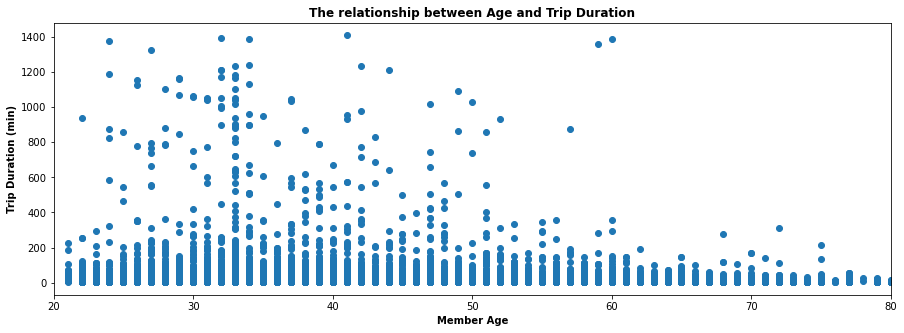

In [64]:
# let's see the relationship between riders' Ages and  their trip duration
df['duration_min'] = df['duration_sec']/60
plt.figure(figsize=[15, 5])
plt.scatter(data=df, x='member_age', y='duration_min');
plt.title('The relationship between Age and Trip Duration', weight='bold')
plt.xlabel('Member Age', weight='bold');
plt.ylabel('Trip Duration (min)', weight='bold');
plt.xlim(20, 80);

## It seems that riders' ages between 25 and 50 can ride longer than the others 

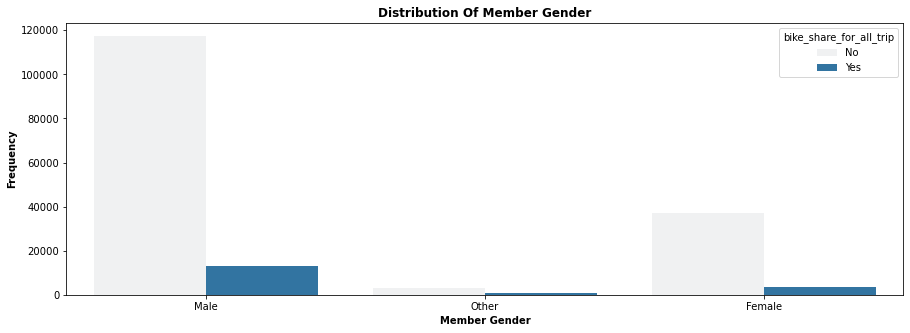

In [65]:
# let's see the relationship between riders' genders and  if there is (Bike Share For All Trip) or not
CountPlot(df, 'member_gender', hue='bike_share_for_all_trip');

## It seems that most of riders(Males/Females/Others) didn't share their bike for all trip

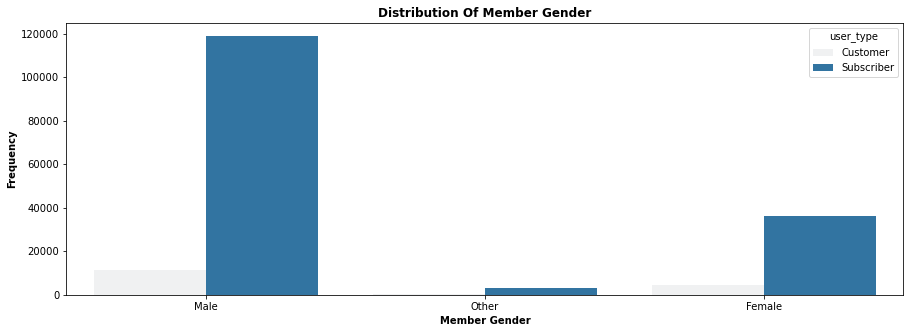

In [66]:
# let's see the relationship between riders' genders and  if the rider is customer or subscriber
CountPlot(df, 'member_gender', hue='user_type');

## It seems that most of riders(Males/Females/Others) are subscribers

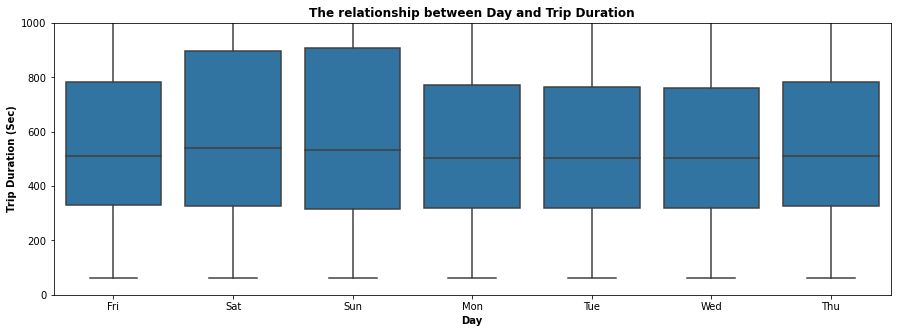

In [67]:
# let's see the relationship between week's days and trip duration that the rider takes
plt.figure(figsize=[15, 5])
sb.boxplot(data=df, x='start_day', y='duration_sec', color=base_color, order=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']);
plt.title('The relationship between Day and Trip Duration', weight='bold')
plt.xlabel('Day', weight='bold');
plt.ylabel('Trip Duration (Sec)', weight='bold');
plt.ylim(0, 1000);

## It seems that saturday and sunday have more trip durations than the other days

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> ages between 25 and 50 can ride longer, that makes sense because rider's age is an important factor. Maybe we can make bikes for the elderly.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> After i made (start_day) column I noticed that saturday and sunday have more trip durations maybe as saturday and sunday are holidays!

## Multivariate Exploration

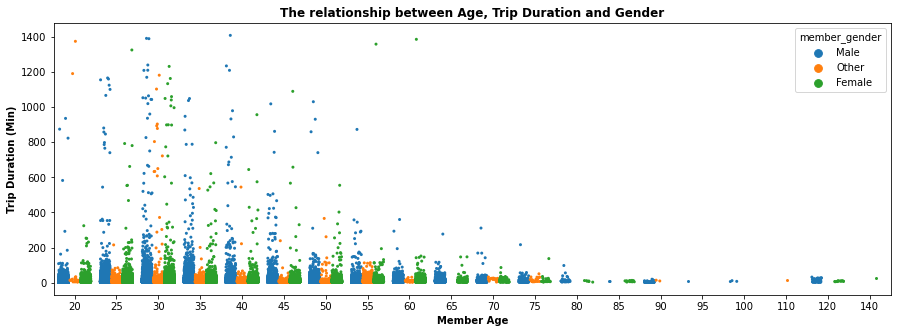

In [68]:
# let's see the relationship between age, trip duration and gender
df['member_age_v2']=((df['member_age']//5)*5).astype(int)
plt.figure(figsize=[15, 5])
sb.stripplot(data=df, x= 'member_age_v2', y= 'duration_min', hue= 'member_gender', jitter=0.35, dodge=True, size=3)
plt.title('The relationship between Age, Trip Duration and Gender', weight='bold')
plt.xlabel('Member Age', weight='bold');
plt.ylabel('Trip Duration (Min)', weight='bold');

## Members between 30 and 50 years old can ride longer especially the males

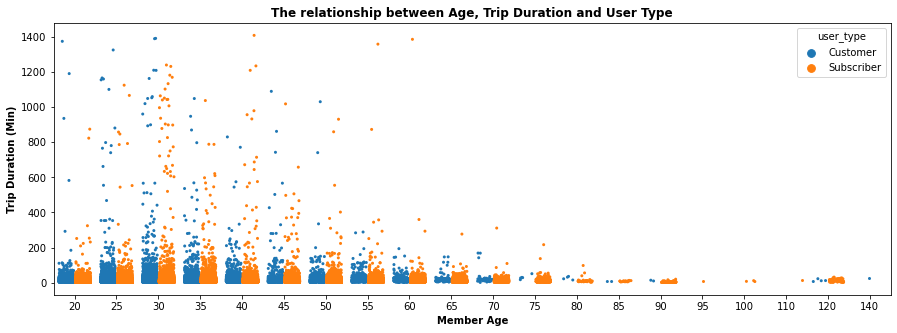

In [69]:
# let's see the relationship between user type, trip duration and user type
plt.figure(figsize=[15, 5])
sb.stripplot(data=df, x= 'member_age_v2', y= 'duration_min', hue= 'user_type', jitter=0.35, dodge=True, size=3)
plt.title('The relationship between Age, Trip Duration and User Type', weight='bold')
plt.xlabel('Member Age', weight='bold');
plt.ylabel('Trip Duration (Min)', weight='bold');

## It seems that members between 25 and 30 years old can ride longer especially the customers

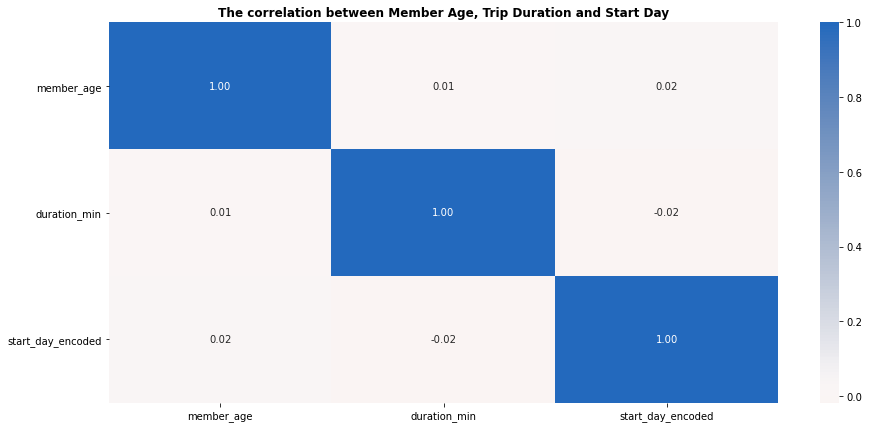

In [70]:
# let's see if there is a correlation between member age, trip duration and start day
# First, we turn the start_day column into a dummy column so we can know the correlation between it and the other numerical columns
df['start_day_encoded'] = df['start_day'].map({'Fri':1, 'Sat':2, 'Sun':3, 'Mon':4, 'Tue':5, 'Wed':6, 'Thu':7})
group=['member_age', 'duration_min', 'start_day_encoded']
plt.figure(figsize=[15, 7])
sb.heatmap(df[group].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('The correlation between Member Age, Trip Duration and Start Day', weight='bold')
plt.yticks(rotation=0);

## It seems that there is a negative correlation between trip duration and start day, And there is a positive correlation between member age and start day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In general, the females ride longer than the males but if we put a limits between 30 and 40, we will find out that the males ride longer.

### Were there any interesting or surprising interactions between features?

> There is a negative correlation between trip duration and start day, unlike between member age and start day.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!